# Calculating derivatives

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from derivatives import *

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

## First investigate the Tableau from Ridders' method

In [3]:

f = math.exp
h = 0.01
x = 1.5
np.exp(x)
der,error = derivative_ridders(f,x,h,n=5,verbose=True)

------------ i =  0
[[4.48176377 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
------------ i =  1
[[4.48172718 0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
------------ i =  2
[[4.48172718 4.48170851 0.         0.         0.        ]
 [0.         4.48168907 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]]
------------ i =  3
[[4.48172718 4.48170851 4.48169899 0.         0

## Now check the accuracy of the methods for a few functions

Including the crazy $\sin(1/x)$. 

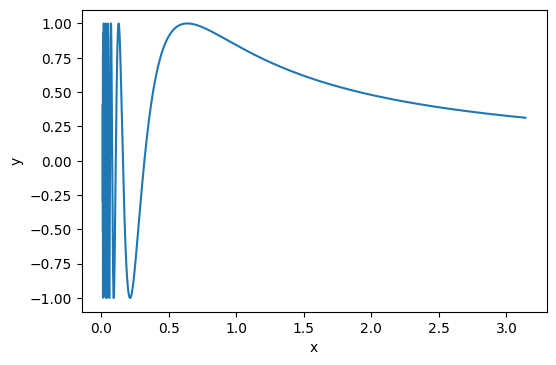

In [4]:

a = 0.01
b = np.pi
xvals = np.linspace(a,b,10000)
yvals = np.sin(1./xvals)
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xvals,yvals)
plt.show()

In [5]:
print ("Testing algorithms for computing numeric derivatives")

error = 0.0
h = 0.01

der_funcs = [
    [np.exp, np.exp, "exp"],
    [np.sin, np.cos, "sin"],
    [lambda x : x**2, lambda x : 2*x, "x^2"],
    [lambda x : np.sin(1/x), lambda x : np.cos(x)*np.log(x), "sin(1/x)" ]
]

x = 3.
print("------ x = %1.0f,  expected error = h^4 = %5.2e" %(x, h**4))    
for dfunc,tfunc,name in der_funcs:
    xprime,error =  derivative_ridders( dfunc, x, h )
    xprime2 = derivative_fivepoint(dfunc,x,h)
    print ('D {0:8s} = {1:+16.12e}, ridders = {2:+16.12e}, 5pt = {3:+16.12e} obs error = {4:+3.1e}'.format( name, tfunc(x), xprime, xprime2, error))


Testing algorithms for computing numeric derivatives
------ x = 3,  expected error = h^4 = 1.00e-08
D exp      = +2.008553692319e+01, ridders = +2.008553692319e+01, 5pt = +2.008553691649e+01 obs error = +2.4e-13
D sin      = -9.899924966004e-01, ridders = -9.899924966005e-01, 5pt = -9.899924962704e-01 obs error = +1.4e-14
D x^2      = +6.000000000000e+00, ridders = +6.000000000000e+00, 5pt = +6.000000000000e+00 obs error = +8.9e-16
D sin(1/x) = -1.087617922454e+00, ridders = -1.049952162572e-01, 5pt = -1.049952162230e-01 obs error = +8.3e-16
